# Fingerprint Classification Using Keras!

## Imports
Here, we'll import all the packages we need for this project.

In [ ]:
# If not already installed
!pip install keras
!pip install scikit-learn
import keras

# OR
from tensorflow import keras

# Sequential model is very useful in Keras
from keras.models import Sequential, model_from_json, model_from_yaml

# Import different layers for defining our networks
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical

# Shuffle dataset
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Import numpy
import numpy as np

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

# For reading paths
import os

# For reading BMP files
import cv2 as cv

# Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset
We will extract the needed files for the dataset here that we can use for our machine learning algorithm.  We'll show what the files in the datasets look like, but actually load our data using the `numpy` library.

In [ ]:
# Root dataset path
dataset_path = os.path.join("drive", "MyDrive", "PTC", "dataset", "dataset_FVC2000_DB4_B", "dataset")

# Training, testing, and npy paths
train_path = os.path.join(dataset_path, "train_data")
real_path = os.path.join(dataset_path, "real_data")
np_path = os.path.join(dataset_path, "np_data")

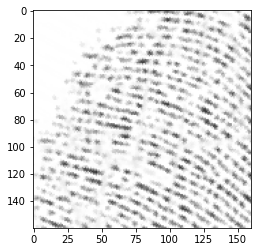

In [ ]:
def view_random_imgs(train_path):
  all_imgs = os.listdir(train_path)
  file_to_show = all_imgs[np.random.randint(low=0, high=len(all_imgs))]
  example_image_path = os.path.join(train_path, file_to_show)
  A = cv.imread(example_image_path)
  plt.imshow(A)

view_random_imgs(train_path)

In [ ]:
def load_datasets(base_path):
  """Function to load paths from dataset.

  Parameters:
      base_path (str): String denoting the root path of the dataset.

  Returns:
      x_train (np.array): Array corresponding to the training inputs of
          the dataset.
      y_train (np.array): Array corresponding to the training labels of
          the dataset.
      x_test (np.array): Array corresponding to the testing inputs of
          the dataset.
      y_test (np.array): Array corresponding to the testing labels of
          the dataset.
  """
  # Load data from the npy directory
  # Training data
  img_train_path = os.path.join(np_path, "img_train.npy")
  label_train_path = os.path.join(np_path, "label_train.npy")

  # Testing data
  img_test_path = os.path.join(np_path, "img_real.npy")
  label_test_path = os.path.join(np_path, "label_real.npy")

  # Load arrays - training data
  x_train = np.load(img_train_path)
  y_train = np.load(label_train_path)

  # Shuffle the dataset
  x_train, y_train = shuffle(x_train, y_train)

  # Split dataset into training and validation
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                    test_size=0.2, random_state=42)

  # Testing data
  x_test = np.load(img_test_path)
  y_test = np.load(label_test_path)

  # One-hot encode target column
  y_train = to_categorical(y_train)
  y_val = to_categorical(y_val)
  y_test = to_categorical(y_test)
  
  return (x_train, y_train), (x_val, y_val), (x_test, y_test)

# Load the data
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_datasets(dataset_path)

## Create and Compile the Model!
Next, we're ready to create and compile the model.  Since we are given images as input, we will want to use a **Convolutional Neural Network**.  Try modifying the layers below to get the best performance with the neural network.

In [ ]:
# First, create the model
model = Sequential()

#add model layers

# Feature extraction component (Conv2D and MaxPooling2D layers)
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(160,160,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# Transition from feature extraction to classification (Flatten layer)
model.add(Flatten())

# Classification component (Dense layers and Dropout)
model.add(Dense(100, activation='relu'))  # MLP 1

# Fully connected layers
model.add(Dense(25, activation='relu'))  # MLP 2
model.add(Dense(25, activation='relu'))  # MLP 3

# Output layer
model.add(Dense(10, activation='softmax'))  # Output layer

# Now get information about the model
print(model.summary())

# Use our model from above!
print(model.layers)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 158, 158, 64)      640       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 156, 156, 32)      18464     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 154, 154, 16)      4624      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 154, 154, 16)      0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 379456)            0         
_________________________________________________________________
dense_39 (Dense)             (None, 100)               37945700  
_________________________________________________________________
dense_40 (Dense)             (None, 25)              

In [ ]:
#train the model
EPOCHS = 100
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=EPOCHS)

Epoch 1/100
20/20 [==============================] - 2s 87ms/step - loss: 231.6970 - accuracy: 0.1284 - val_loss: 2.2779 - val_accuracy: 0.1125
Epoch 2/100
20/20 [==============================] - 2s 78ms/step - loss: 2.2705 - accuracy: 0.1508 - val_loss: 2.2862 - val_accuracy: 0.1187
Epoch 3/100
20/20 [==============================] - 2s 84ms/step - loss: 2.2608 - accuracy: 0.2049 - val_loss: 2.2746 - val_accuracy: 0.1125
Epoch 4/100
20/20 [==============================] - 2s 78ms/step - loss: 2.2190 - accuracy: 0.1902 - val_loss: 2.2525 - val_accuracy: 0.0938
Epoch 5/100
20/20 [==============================] - 2s 79ms/step - loss: 2.0459 - accuracy: 0.2401 - val_loss: 2.2371 - val_accuracy: 0.1187
Epoch 6/100
20/20 [==============================] - 2s 79ms/step - loss: 1.8625 - accuracy: 0.3525 - val_loss: 2.2851 - val_accuracy: 0.1312
Epoch 7/100
20/20 [==============================] - 2s 80ms/step - loss: 1.5643 - accuracy: 0.4719 - val_loss: 2.4503 - val_accuracy: 0.1500
Epoc